#**Rでオープンデータ（FRED)を利用する**

このColabノートブックでは、ライブラリquantmodを使って、オープンデータを利用する方法を説明します。

具体的には、FREDからオープンデータである経済統計（経済データ）をダウンロードする方法を解説します。また、最後に応用問題として日本のフィリップス曲線をプロットする方法を説明します。

なお、このノートブックは「[Rの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。


**FREDとは？**
<br>
FRED（Federal Reserve Economic Data）とはアメリカのセントルイス連邦準備銀行が提供している経済統計データベースです。このサイトではアメリカを含め世界各国の経済統計（経済データ）約80万種類が提供されています。提供しているデータはすべてオープンデータです（オープンデータは講義資料で説明済み）。

**FRED公式サイト**
<br>
https://fred.stlouisfed.org/

In [1]:
# ライブラリquantmodをインストールします。最初に少し時間がかかります
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [7]:
# 最初に必要なライブラリを読み込みます
library(quantmod)
library(tidyverse)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()



まず、日本の実質GDPを探します。Googleで"FRED japan real gdp"と検索するとReal Gross Domestic Product for Japanという以下のページが見つかります。

https://fred.stlouisfed.org/series/JPNRGDPEXP

このページにあるJPNRGDPEXPという文字列が「日本の実質GDP」を意味していますので、このJPNRGDPEXPを使ってFREDからデータをダウンロードします。

次にアメリカ合衆国の実質GDPをダウンロードすることを考えてみましょう。Googleで"FRED US real gdp"と検索するとReal Gross Domestic Product (GDPC1)という以下のページが見つかります。 

https://fred.stlouisfed.org/series/GDPC1

このページにあるGDPC1という文字列が「アメリカの実質GDP」を意味していますので、このGDPC1を使ってFREDからデータをダウンロードします。


In [8]:
tickers <-  c("JPNRGDPEXP", "GDPC1")
getSymbols(tickers, src = "FRED")

[1] "JPNRGDPEXP" "GDPC1"

In [4]:
JPNRGDPEXP %>% head()

           JPNRGDPEXP
1994-01-01   446307.3
1994-04-01   443743.5
1994-07-01   448944.9
1994-10-01   447168.4
1995-01-01   452112.9
1995-04-01   456276.0

In [5]:
GDPC1 %>% head()

              GDPC1
1947-01-01 2034.450
1947-04-01 2029.024
1947-07-01 2024.834
1947-10-01 2056.508
1948-01-01 2087.442
1948-04-01 2121.899

日本のGDPは1994年から、アメリカのGDPは1947年からです。2つとも同じ期間でグラフをプロットしてみたい場合、window()という関数を使って指定した期間だけ取り出すことができます。

たとえば、プロットする時期を以下のようにstart.date（開始時期）、end.date（終了時期）として指定します。

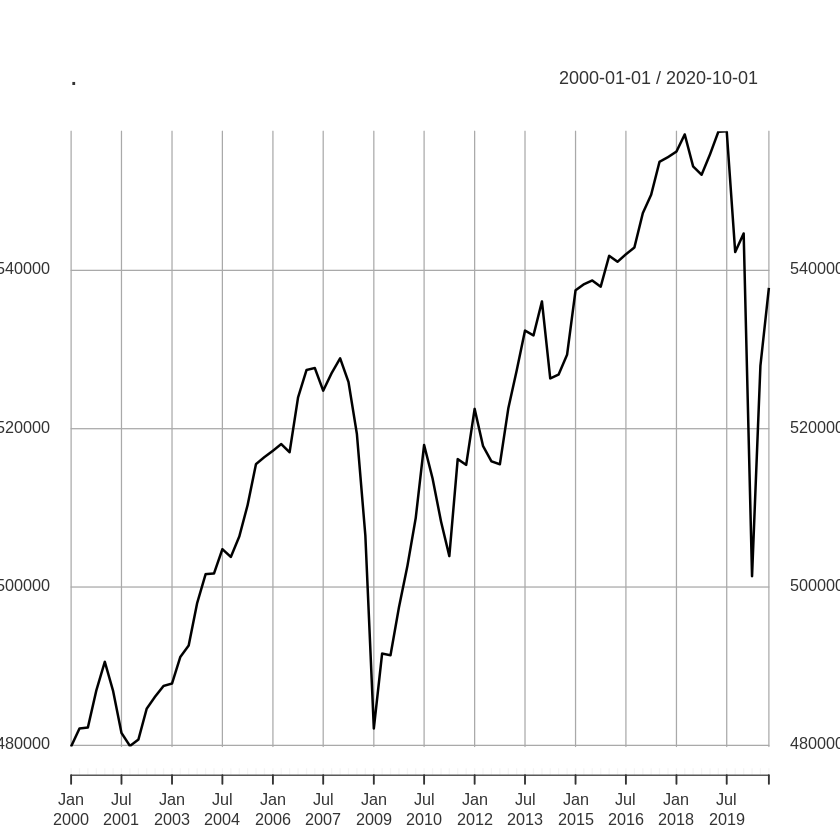

In [9]:
# 開始時期と終了時期
start.date <- "2000-01-01"
end.date <- "2020-12-31"

window(JPNRGDPEXP,start=start.date, end=end.date) %>% plot()

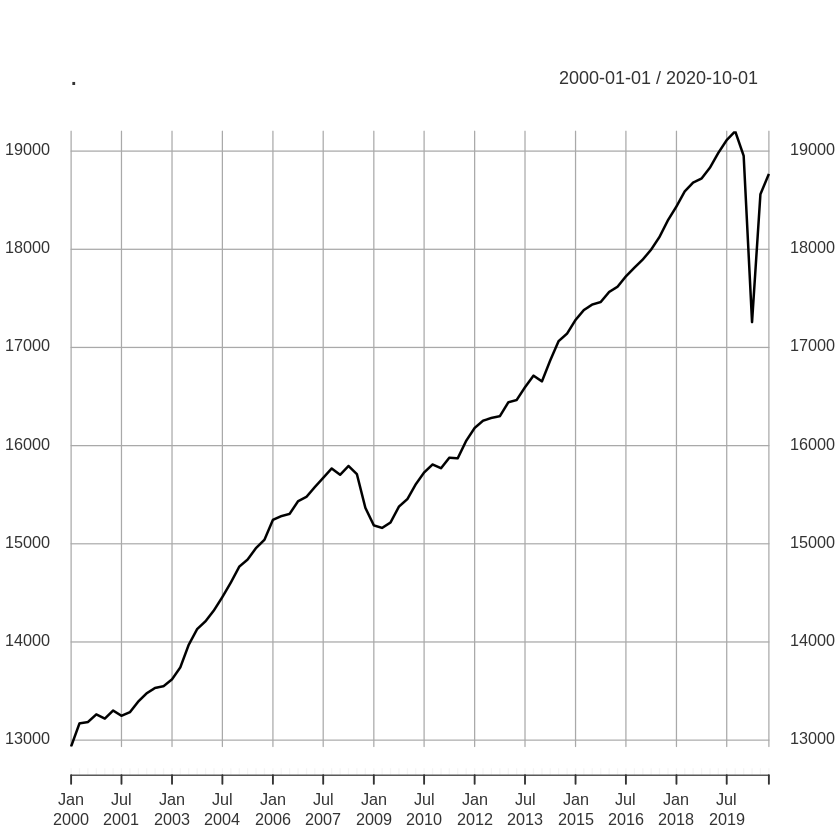

In [10]:
window(GDPC1,start=start.date, end=end.date) %>% plot()

グラフのプロットはとても簡単ですね。

**日・米・仏の失業率**

日・米・仏の失業率をプロットする方法を考えてみましょう。今までと同じように検索を使って、FREDから該当する経済統計（経済データ）を探します。

https://fred.stlouisfed.org/series/LRUN64TTJPM156S

https://fred.stlouisfed.org/series/UNRATE

https://fred.stlouisfed.org/series/LRHUTTTTFRM156S

関数getSymbols()を使ってこれらをFREDからダウンロードします。

In [11]:
tickers <-  c("LRUN64TTJPM156S", "UNRATE", "LRHUTTTTFRM156S")
getSymbols(tickers, src = "FRED")

[1] "LRUN64TTJPM156S" "UNRATE"          "LRHUTTTTFRM156S"

経済統計（経済データ）を取り出す期間は2018年1月から2021年2月末までとしてみましょう（COVID-19で失業率がどのように変化したかを見るため）。

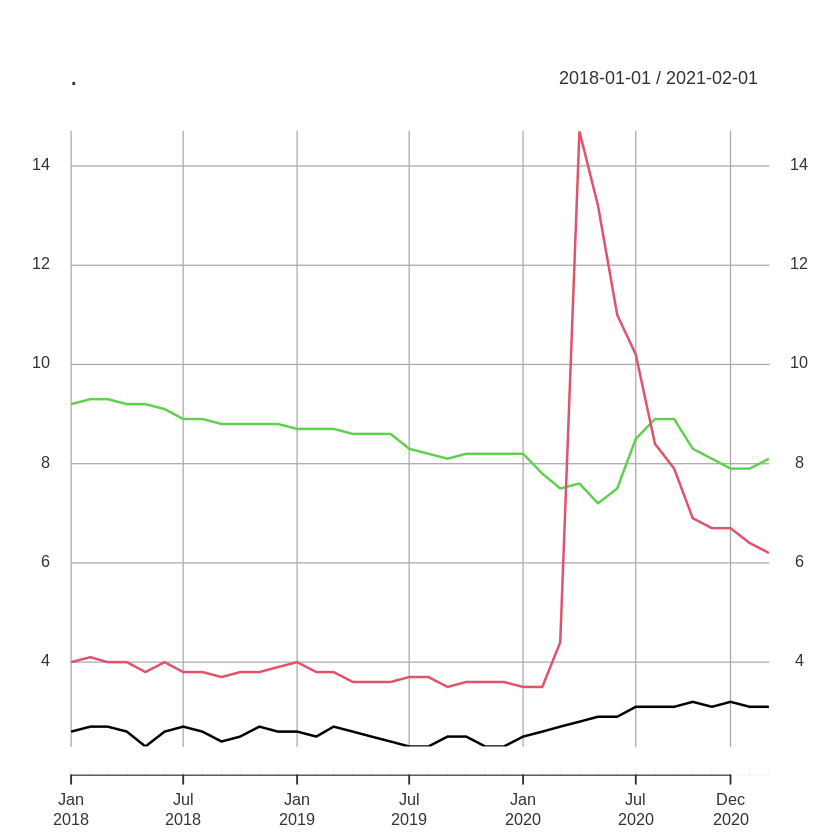

In [12]:
start.date <- "2018-1-1"
end.date <- "2021-2-28"

urate.all <- window(merge.xts(LRUN64TTJPM156S, UNRATE, LRHUTTTTFRM156S), start=start.date, end=end.date)
urate.all %>% plot()

日米仏の失業率の変化はそれぞの国の違いが出て興味深い結果となりました。

**日本のフィリップス曲線をプロット**

最後に今までの知識を使って日本のフィリップス曲線をプロットしてみましょう。

https://fred.stlouisfed.org/series/LRUN64TTJPA156N

https://fred.stlouisfed.org/series/FPCPITOTLZGJPN



In [13]:
# 開始時期と終了時期
start.date <- "1970-01-01"
end.date <- "2020-12-31"

tickers <- c("FPCPITOTLZGJPN", "LRUN64TTJPA156N")
getSymbols(tickers, src = "FRED")

[1] "FPCPITOTLZGJPN"  "LRUN64TTJPA156N"

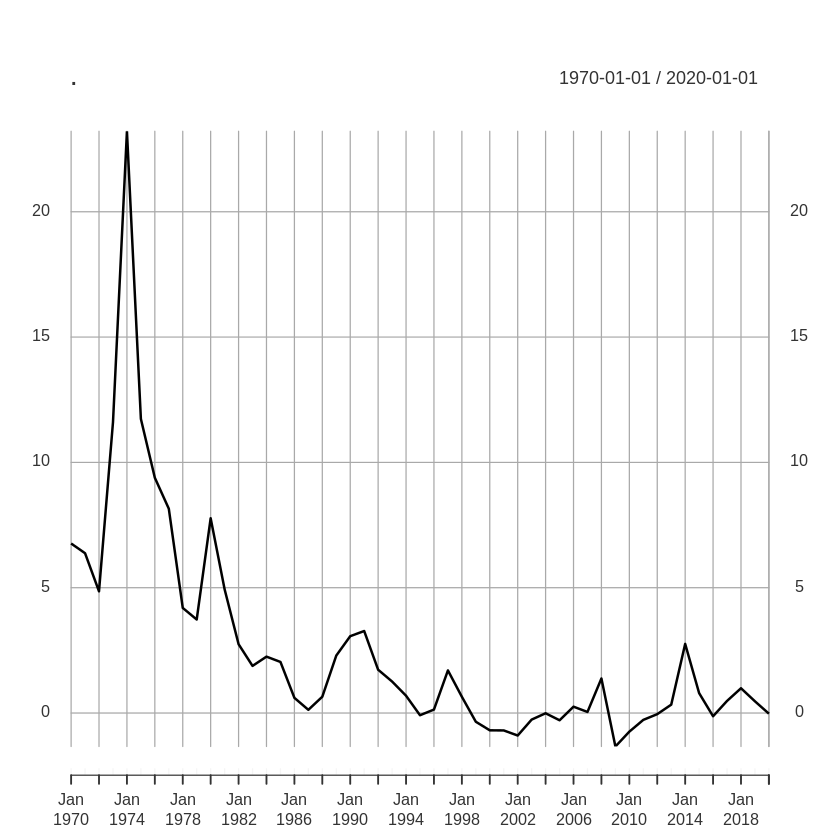

In [14]:
jp.macro <- window(merge.xts(FPCPITOTLZGJPN, LRUN64TTJPA156N), start=start.date, end=end.date)
names(jp.macro) <- c("inf.rate","unemp.rate")
jp.macro$inf.rate %>% plot()

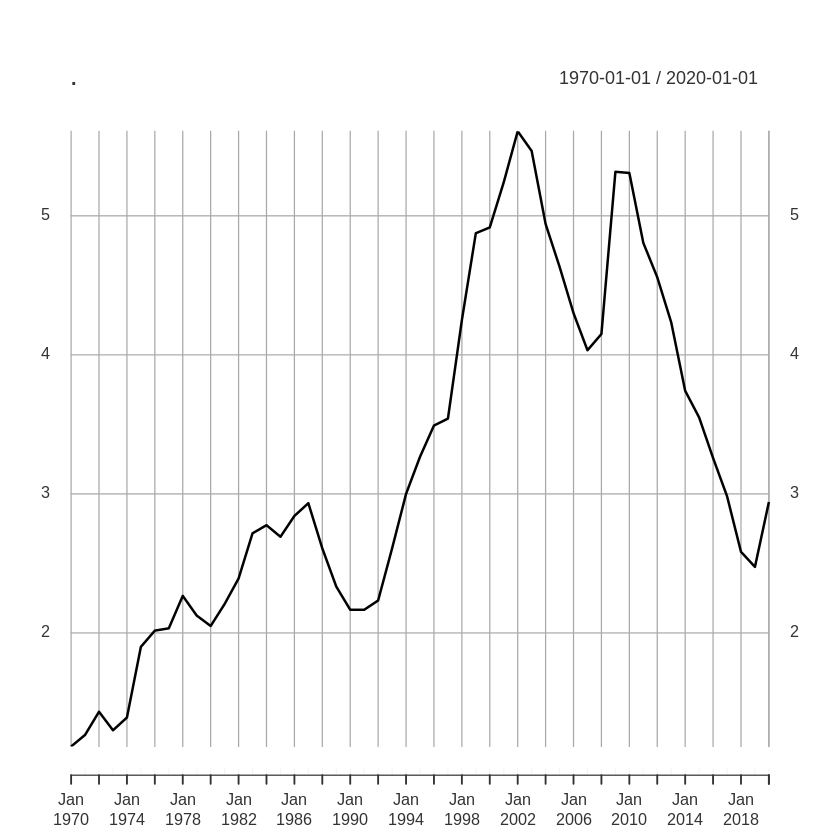

In [15]:
jp.macro$unemp.rate %>% plot()

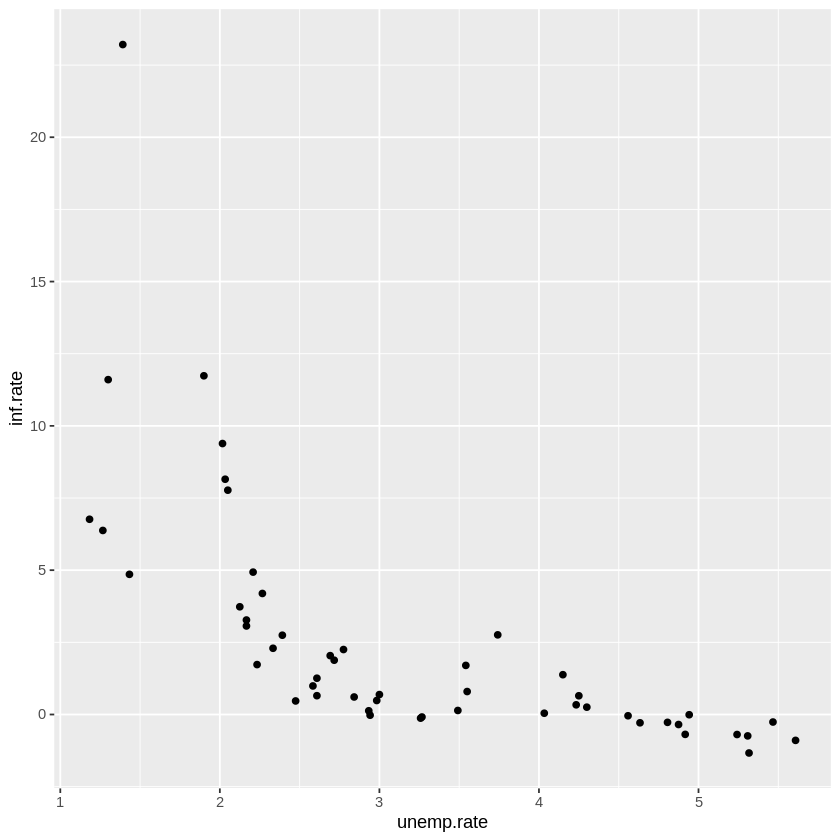

In [16]:
# ggplot2で散布図作成
jp.macro %>% ggplot(aes(x = unemp.rate, y = inf.rate)) + geom_point()

散布図に日本のフィリップス曲線が表示されました。案外簡単ですね。

この例から「Rを学ぶと効率的にデータ分析ができるようになる」ことを分かってもらえればと思います。

> なお、授業で説明したとおり、散布図は相関を示すときには有力な手法ですが、因果を意味するわけではありません。
